In [110]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

plt.style.use('seaborn-notebook')

%matplotlib inline

In [2]:
orig_data = pd.read_csv('../data/kc_house_data.csv', index_col=0)
df = orig_data.copy()

In [3]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
id,,,,,,,,,,,,,,,,,,,,,
7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [4]:
df.info()
# Heat source and sewer system have nulls

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30155 entries, 7399300360 to 9557800100
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           30155 non-null  object 
 1   price          30155 non-null  float64
 2   bedrooms       30155 non-null  int64  
 3   bathrooms      30155 non-null  float64
 4   sqft_living    30155 non-null  int64  
 5   sqft_lot       30155 non-null  int64  
 6   floors         30155 non-null  float64
 7   waterfront     30155 non-null  object 
 8   greenbelt      30155 non-null  object 
 9   nuisance       30155 non-null  object 
 10  view           30155 non-null  object 
 11  condition      30155 non-null  object 
 12  grade          30155 non-null  object 
 13  heat_source    30123 non-null  object 
 14  sewer_system   30141 non-null  object 
 15  sqft_above     30155 non-null  int64  
 16  sqft_basement  30155 non-null  int64  
 17  sqft_garage    30155 non-null  int64

In [133]:
df.describe()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_garage,sqft_patio,yr_built,yr_renovated,Renovations,Age of Renovation,grade_num,heat_num,condition_num
count,3.015500e+04,30155.000000,30155.000000,30155.000000,3.015500e+04,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30123.000000,30155.000000
mean,1.108536e+06,3.413530,2.334737,2112.424739,1.672360e+04,1.543492,330.211142,217.412038,1975.163953,90.922301,0.045498,1.075178,7.651368,1.428842,3.471298
std,8.963857e+05,0.981612,0.889556,974.044318,6.038260e+04,0.567717,285.770536,245.302792,32.067362,416.473038,0.208398,6.234317,1.148978,0.708543,0.702517
min,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,0.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,0.000000,40.000000,1953.000000,0.000000,0.000000,0.000000,7.000000,1.000000,3.000000
50%,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,400.000000,150.000000,1977.000000,0.000000,0.000000,0.000000,8.000000,1.000000,3.000000
75%,1.300000e+06,4.000000,3.000000,2619.500000,1.057900e+04,2.000000,510.000000,320.000000,2003.000000,0.000000,0.000000,0.000000,8.000000,2.000000,4.000000
max,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,3580.000000,4370.000000,2022.000000,2022.000000,1.000000,98.000000,13.000000,7.000000,5.000000


In [6]:
df = df.drop(df[['date', 'view', 'sqft_lot', 'sqft_above', 'floors','sqft_garage','sqft_patio', 'sqft_basement', 'lat', 'long' ]], axis = 1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,condition,grade,heat_source,sewer_system,sqft_garage,sqft_patio,yr_built,yr_renovated,address
id,,,,,,,,,,,,,,,,,,
7399300360,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,Good,7 Average,Gas,PUBLIC,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ..."
8910500230,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,Average,7 Average,Oil,PUBLIC,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing..."
1180000275,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,Average,7 Average,Gas,PUBLIC,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9..."
1604601802,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,Average,9 Better,Gas,PUBLIC,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington..."
8562780790,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,Average,7 Average,Electricity,PUBLIC,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt..."


In [ ]:
df.isna().sum()

In [7]:
df['grade'].value_counts()

7 Average        11697
8 Good            9410
9 Better          3806
6 Low Average     2858
10 Very Good      1371
11 Excellent       406
5 Fair             393
12 Luxury          122
4 Low               51
13 Mansion          24
3 Poor              13
1 Cabin              2
2 Substandard        2
Name: grade, dtype: int64

In [8]:
df['yr_built'].value_counts()

2021    1707
1968     516
2020     507
1978     493
1977     484
        ... 
1935      39
1901      39
1934      38
1902      36
1933      30
Name: yr_built, Length: 123, dtype: int64

In [9]:


# target = 'price'

In [10]:
historic = df[df['yr_built'] < 1972]  

In [11]:
historic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13498 entries, 7399300360 to 9557800100
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         13498 non-null  float64
 1   bedrooms      13498 non-null  int64  
 2   bathrooms     13498 non-null  float64
 3   sqft_living   13498 non-null  int64  
 4   sqft_lot      13498 non-null  int64  
 5   floors        13498 non-null  float64
 6   waterfront    13498 non-null  object 
 7   greenbelt     13498 non-null  object 
 8   nuisance      13498 non-null  object 
 9   condition     13498 non-null  object 
 10  grade         13498 non-null  object 
 11  heat_source   13476 non-null  object 
 12  sewer_system  13496 non-null  object 
 13  sqft_garage   13498 non-null  int64  
 14  sqft_patio    13498 non-null  int64  
 15  yr_built      13498 non-null  int64  
 16  yr_renovated  13498 non-null  int64  
 17  address       13498 non-null  object 
dtypes: float64(3

In [12]:
historic['yr_renovated'].value_counts()

0       12245
2021       55
2006       43
1990       41
2018       38
        ...  
1951        1
1948        1
1972        1
1966        1
1924        1
Name: yr_renovated, Length: 83, dtype: int64

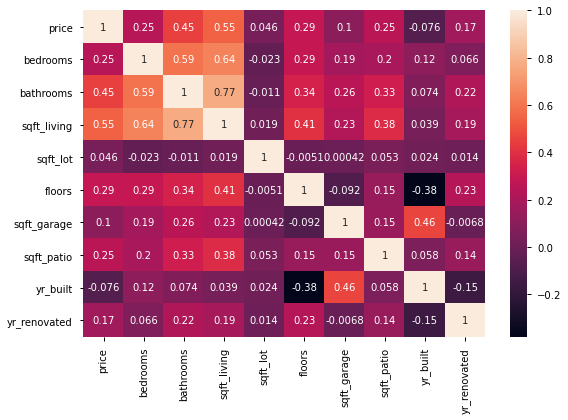

In [13]:
sns.heatmap(historic.corr(),annot=True)
fig=plt.gcf()
fig.set_size_inches(9,6)
plt.show()

# BUILDING CONDITION

	Relative to age and grade. Coded 1-5.

1 = Poor- Worn out. Repair and overhaul needed on painted surfaces, roofing, plumbing, heating and numerous functional inadequacies. Excessive deferred maintenance and abuse, limited value-in-use, approaching abandonment or major reconstruction; reuse or change in occupancy is imminent. Effective age is near the end of the scale regardless of the actual chronological age.

2 = Fair- Badly worn. Much repair needed. Many items need refinishing or overhauling, deferred maintenance obvious, inadequate building utility and systems all shortening the life expectancy and increasing the effective age.

3 = Average- Some evidence of deferred maintenance and normal obsolescence with age in that a few minor repairs are needed, along with some refinishing. All major components still functional and contributing toward an extended life expectancy. Effective age and utility is standard for like properties of its class and usage.

4 = Good- No obvious maintenance required but neither is everything new. Appearance and utility are above the standard and the overall effective age will be lower than the typical property.

5= Very Good- All items well maintained, many having been overhauled and repaired as they have shown signs of wear, increasing the life expectancy and lowering the effective age with little deterioration or obsolescence evident with a high degree of utility.

# BUILDING GRADE

Represents the construction quality of improvements. Grades run from grade 1 to 13. Generally defined as:

1-3 Falls short of minimum building standards. Normally cabin or inferior structure.

4 Generally older, low quality construction. Does not meet code.

5 Low construction costs and workmanship. Small, simple design.

6 Lowest grade currently meeting building code. Low quality materials and simple designs.

7 Average grade of construction and design. Commonly seen in plats and older sub-divisions.

8 Just above average in construction and design. Usually better materials in both the exterior and interior finish work.

9 Better architectural design with extra interior and exterior design and quality.

10 Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.

11 Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.

12 Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.

13 Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc.

In [14]:
df.corr()['price']

price           1.000000
bedrooms        0.289204
bathrooms       0.480401
sqft_living     0.608521
sqft_lot        0.085730
floors          0.180576
sqft_garage     0.264169
sqft_patio      0.313409
yr_built        0.096013
yr_renovated    0.084786
Name: price, dtype: float64

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

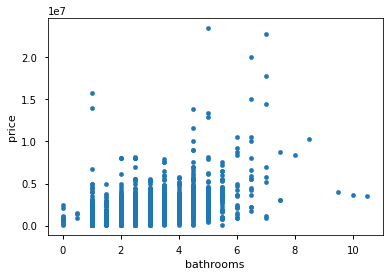

In [15]:
most_corr = "bathrooms"
df.sample(15000, random_state=30).plot.scatter(x=most_corr, y='price')

In [16]:
y = df['price']
X_baseline = df[[most_corr]]

In [17]:
historic.corr()['price']

price           1.000000
bedrooms        0.246299
bathrooms       0.448653
sqft_living     0.546045
sqft_lot        0.046160
floors          0.285116
sqft_garage     0.104236
sqft_patio      0.252655
yr_built       -0.075811
yr_renovated    0.173996
Name: price, dtype: float64

In [18]:
baseline_mod = sm.OLS(y, sm.add_constant(X_baseline))
baseline_res = baseline_mod.fit()

In [19]:
print(baseline_res.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.231
Method:                 Least Squares   F-statistic:                     9047.
Date:                Tue, 13 Sep 2022   Prob (F-statistic):               0.00
Time:                        13:56:38   Log-Likelihood:            -4.5214e+05
No. Observations:               30155   AIC:                         9.043e+05
Df Residuals:                   30153   BIC:                         9.043e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.168e+04   1.27e+04     -1.705      0.0

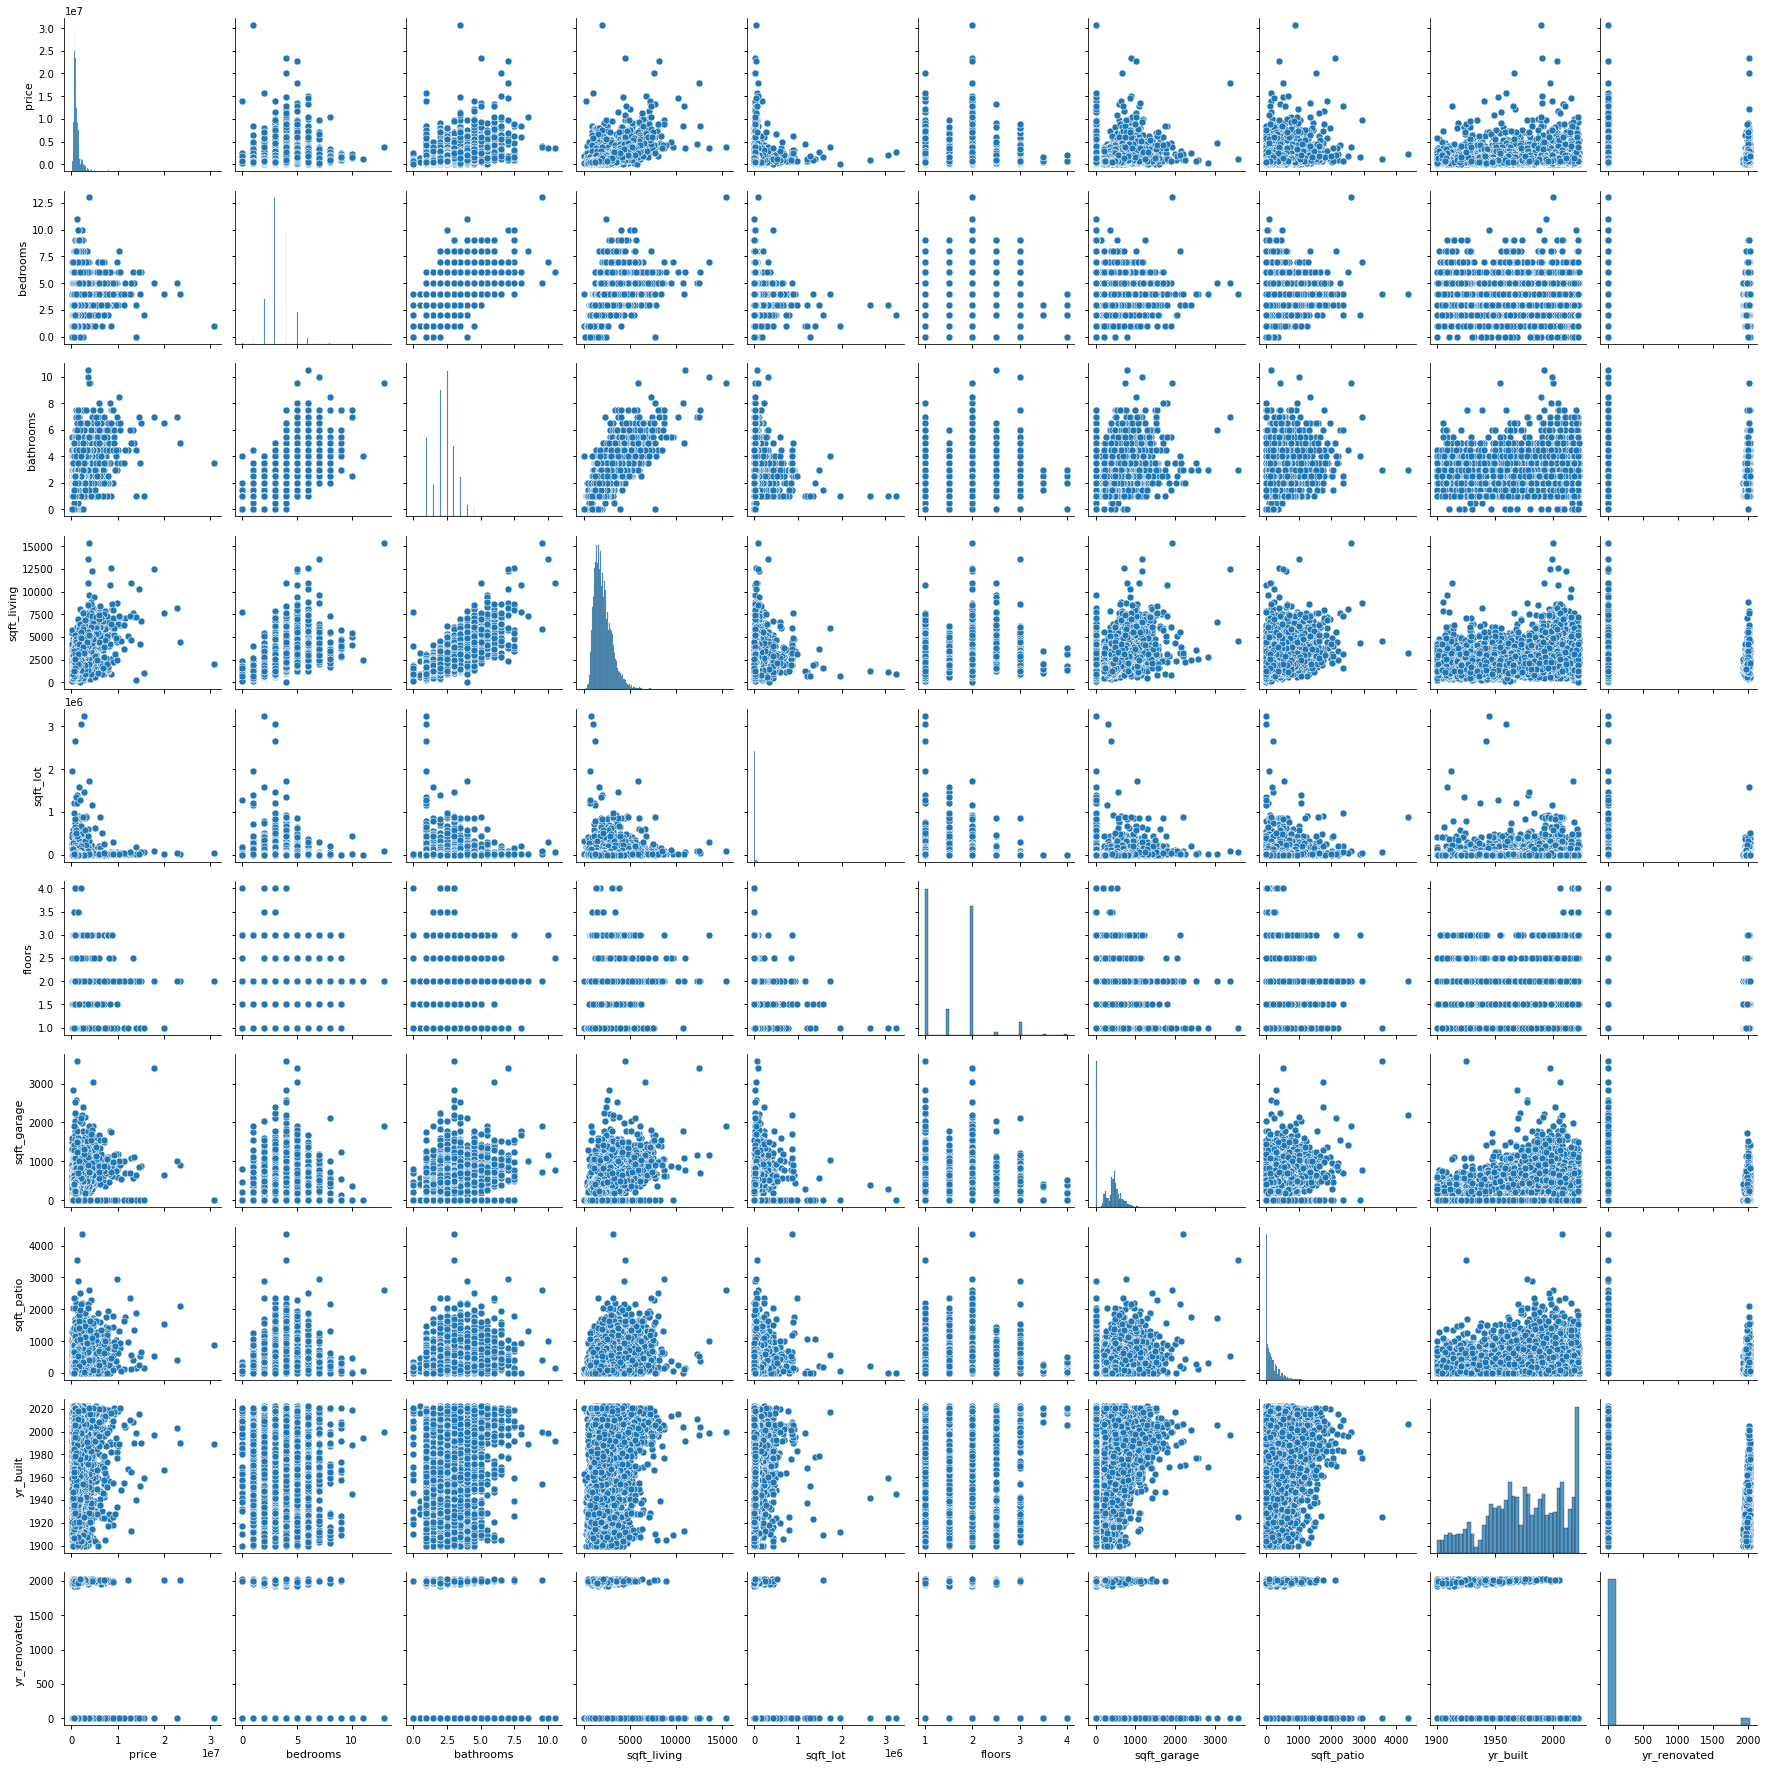

In [20]:
sns.pairplot(df)

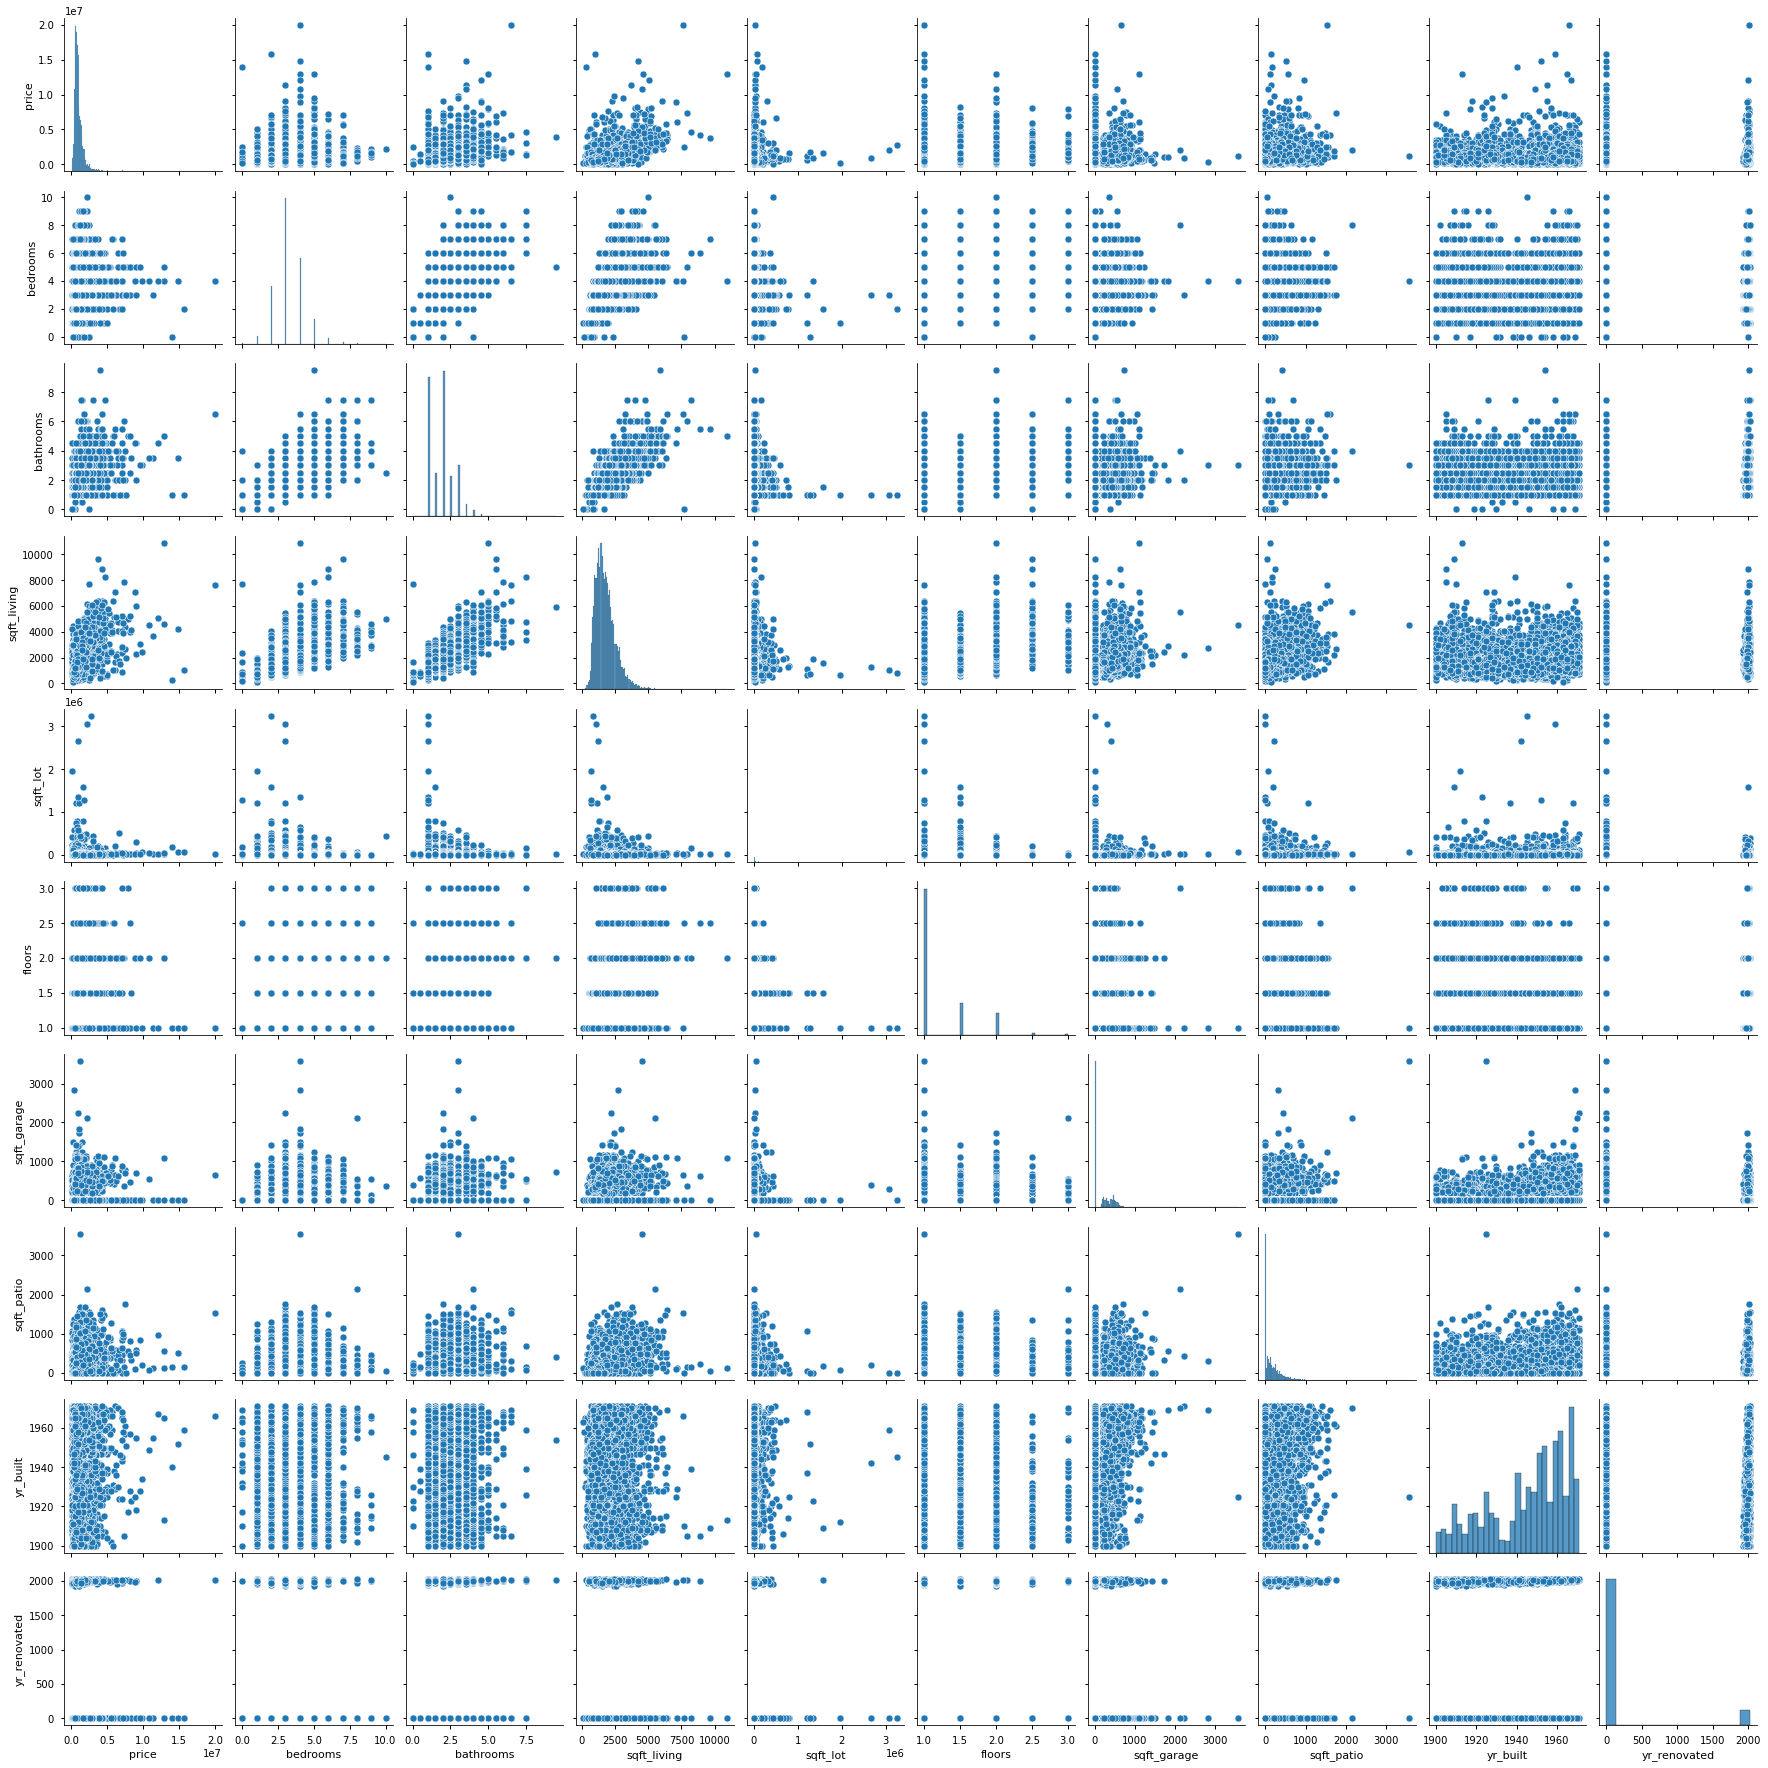

In [21]:
sns.pairplot(historic)

In [22]:
df.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
greenbelt        0
nuisance         0
condition        0
grade            0
heat_source     32
sewer_system    14
sqft_garage      0
sqft_patio       0
yr_built         0
yr_renovated     0
address          0
dtype: int64

In [23]:
total_null = 0 
for null_count in df.isnull().sum():
    total_null += null_count
total_null

46

In [24]:
print(df['heat_source'].value_counts())
print(df['sewer_system'].value_counts())

Gas                  20583
Electricity           6465
Oil                   2899
Gas/Solar               93
Electricity/Solar       59
Other                   20
Oil/Solar                4
Name: heat_source, dtype: int64
PUBLIC                25777
PRIVATE                4355
PRIVATE RESTRICTED        6
PUBLIC RESTRICTED         3
Name: sewer_system, dtype: int64


In [25]:
# df.yr_renovated.unique()
historic['yr_renovated'].unique()

array([   0, 2005, 1995, 2008, 1978, 2015, 1992, 1990, 2004, 2019, 1998,
       1979, 2011, 2014, 1994, 1983, 1970, 1996, 2017, 1954, 2018, 1989,
       1982, 2006, 2002, 2007, 2013, 2003, 1988, 2000, 2016, 2021, 1971,
       1984, 1993, 2001, 1965, 1967, 1981, 1963, 1987, 1985, 1991, 1997,
       1955, 2012, 1986, 1999, 1956, 1962, 2020, 1969, 2009, 1950, 2010,
       1947, 1977, 1964, 1957, 1952, 1960, 1966, 1980, 2022, 1949, 1930,
       1959, 1974, 1928, 1961, 1946, 1968, 1975, 1973, 1958, 1976, 1945,
       1940, 1942, 1951, 1948, 1972, 1924], dtype=int64)

In [26]:
df['yr_renovated'].value_counts()
# **28,783 OUT OF 30K HOUSES HAVE NOT BEEN RENOVATED

0       28783
2021       69
2006       49
2018       44
1990       42
        ...  
1924        1
1942        1
1972        1
1951        1
1930        1
Name: yr_renovated, Length: 83, dtype: int64

In [27]:
historic['yr_renovated'].value_counts()
# *12,245 houses (from historic DF) have not been renovated

0       12245
2021       55
2006       43
1990       41
2018       38
        ...  
1951        1
1948        1
1972        1
1966        1
1924        1
Name: yr_renovated, Length: 83, dtype: int64

In [28]:
# EDA OF CONDITION

mean_cond = df.groupby("condition")["price"].mean()
median_cond = df.groupby("condition")["price"].median()
condition = np.arange(1,6)
print(mean_cond)
print(median_cond)


condition
Average      1.134336e+06
Fair         7.799337e+05
Good         1.053242e+06
Poor         6.482829e+05
Very Good    1.130726e+06
Name: price, dtype: float64
condition
Average      860000.0
Fair         654000.0
Good         855000.0
Poor         525000.0
Very Good    900000.0
Name: price, dtype: float64


<BarContainer object of 5 artists>

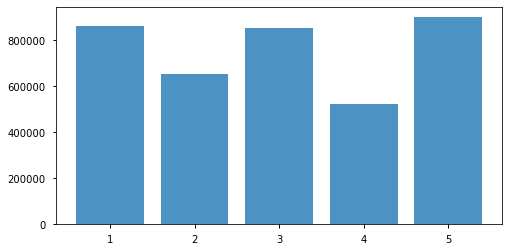

In [29]:
fig, ax = plt.subplots(figsize=(8,4))

ax.bar(x=condition, height=median_cond,
       label="Median Price", alpha=0.8)
# Condition v. price

<BarContainer object of 5 artists>

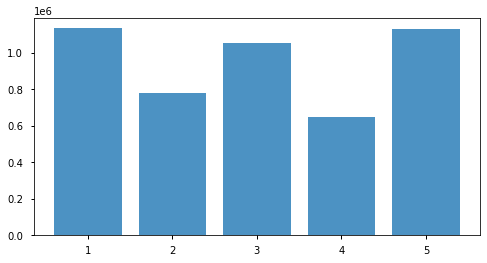

In [30]:
fig, ax = plt.subplots(figsize=(8,4))
ax.bar(x=condition, height=mean_cond,
        label="Mean Price", alpha=0.8)
# Condition vs. price

In [31]:
df['Renovations'] = df['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)
df["Age of Renovation"] = df['yr_renovated'].apply(lambda x: 2022-x if x > 0 else 0)
#Added column to show whether or not house was renovated, and if so how long ago

In [33]:
df['grade'].value_counts()

7 Average        11697
8 Good            9410
9 Better          3806
6 Low Average     2858
10 Very Good      1371
11 Excellent       406
5 Fair             393
12 Luxury          122
4 Low               51
13 Mansion          24
3 Poor              13
1 Cabin              2
2 Substandard        2
Name: grade, dtype: int64

In [34]:
grade_num = []


for index, row in df.iterrows():
    grade_num.append(int((str(row['grade'])[0:2])))

df['grade_num'] = grade_num
df.drop('grade', axis = 1)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,condition,heat_source,sewer_system,sqft_garage,sqft_patio,yr_built,yr_renovated,address,Renovations,Age of Renovation,grade_num
id,,,,,,,,,,,,,,,,,,,,
7399300360,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,Good,Gas,PUBLIC,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",0,0,7
8910500230,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,Average,Oil,PUBLIC,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",0,0,7
1180000275,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,Average,Gas,PUBLIC,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",0,0,7
1604601802,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,Average,Gas,PUBLIC,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",0,0,9
8562780790,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,Average,Electricity,PUBLIC,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7834800180,1555000.0,5,2.0,1910,4000,1.5,NO,NO,NO,Good,Oil,PUBLIC,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",0,0,8
194000695,1313000.0,3,2.0,2020,5800,2.0,NO,NO,NO,Average,Gas,PUBLIC,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",0,0,7
7960100080,800000.0,3,2.0,1620,3600,1.0,NO,NO,YES,Average,Gas,PUBLIC,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",0,0,7


In [35]:


# ohe = OneHotEncoder(sparse = False)
# ohe.fit_transform(df[['price']])
# zip_encoded = ohe.fit_transform(df[['']])
# zip_enc_df = pd.DataFrame(zip_encoded, columns=ohe.categories_[0], index=df.index)
# df_original = pd.concat([df, zip_enc_df], axis=1)
# ziplist = ohe.categories_[0].tolist()
# zipliststr = []
# for i in ziplist: 
#     zipliststr.append(str(i))
# ord_enc = OrdinalEncoder()
# ord_enc_f_t = ord_enc.fit_transform(df[['bedrooms','grade_num']])
# ord_enc_df = pd.DataFrame(ord_enc_f_t, columns = ['bedrooms_cat','bathrooms_cat','floors_cat','grade_num_cat'], index=df.index)

# df_ord = pd.concat([df_original, ord_enc_df], axis=1)


# df_ord




In [36]:
historic['Renovations'] = historic['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)

<ipython-input-36-2bd8069be832>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  historic['Renovations'] = historic['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)


In [37]:
historic["Age of Renovation"] = historic['yr_renovated'].apply(lambda x: 2022-x if x > 0 else 0)

<ipython-input-37-953e8b91c701>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  historic["Age of Renovation"] = historic['yr_renovated'].apply(lambda x: 2022-x if x > 0 else 0)


In [129]:
historic.corr()
#Strong correlations - bathrooms, grade 
historic_corr = historic.corr()['price'].map(abs).sort_values(ascending=False)
historic_corr

price                1.000000
sqft_living          0.546045
grade_num            0.543023
bathrooms            0.448653
floors               0.285116
sqft_patio           0.252655
bedrooms             0.246299
yr_renovated         0.173996
Renovations          0.173569
Age of Renovation    0.109299
sqft_garage          0.104236
heat_num             0.084620
yr_built             0.075811
condition_num        0.067956
sqft_lot             0.046160
Name: price, dtype: float64

In [131]:
# **HOUSES THAT ARE 50 YRS OLD OR MORE AND HAVE BEEN RENOVATED
historic_renovated = historic[historic['yr_renovated']> 0]
historic_renovated.info()
historic_renovated.corr()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1253 entries, 9842300355 to 9287800505
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              1253 non-null   float64
 1   bedrooms           1253 non-null   int64  
 2   bathrooms          1253 non-null   float64
 3   sqft_living        1253 non-null   int64  
 4   sqft_lot           1253 non-null   int64  
 5   floors             1253 non-null   float64
 6   waterfront         1253 non-null   object 
 7   greenbelt          1253 non-null   object 
 8   nuisance           1253 non-null   object 
 9   condition          1253 non-null   object 
 10  grade              1253 non-null   object 
 11  heat_source        1251 non-null   object 
 12  sewer_system       1253 non-null   object 
 13  sqft_garage        1253 non-null   int64  
 14  sqft_patio         1253 non-null   int64  
 15  yr_built           1253 non-null   int64  
 16  yr_renova

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_garage,sqft_patio,yr_built,yr_renovated,Renovations,Age of Renovation,heat_num,condition_num,grade_num
price,1.000000,0.266704,0.497180,0.655067,0.039381,0.217501,0.237220,0.337452,0.108564,0.091167,NaN,-0.091167,-0.120422,0.063796,0.653768
bedrooms,0.266704,1.000000,0.621536,0.601415,-0.046708,0.305814,0.163695,0.134305,0.057483,0.114584,NaN,-0.114584,-0.122815,0.014867,0.374928
bathrooms,0.497180,0.621536,1.000000,0.758479,-0.027686,0.420588,0.263444,0.262673,0.072035,0.187797,NaN,-0.187797,-0.211043,0.030537,0.606046
sqft_living,0.655067,0.601415,0.758479,1.000000,0.038821,0.435897,0.308078,0.359284,0.071704,0.085582,NaN,-0.085582,-0.160031,0.030428,0.739720
sqft_lot,0.039381,-0.046708,-0.027686,0.038821,1.000000,-0.018443,0.025643,0.112088,0.003696,-0.042804,NaN,0.042804,0.023726,0.010221,-0.003672
floors,0.217501,0.305814,0.420588,0.435897,-0.018443,1.000000,-0.013557,0.119678,-0.257048,-0.025343,NaN,0.025343,-0.083777,0.000635,0.391234
sqft_garage,0.237220,0.163695,0.263444,0.308078,0.025643,-0.013557,1.000000,0.208506,0.373995,0.090183,NaN,-0.090183,-0.096545,-0.023313,0.291161
sqft_patio,0.337452,0.134305,0.262673,0.359284,0.112088,0.119678,0.208506,1.000000,0.095216,-0.047569,NaN,0.047569,-0.053571,0.070183,0.311491
yr_built,0.108564,0.057483,0.072035,0.071704,0.003696,-0.257048,0.373995,0.095216,1.000000,0.269696,NaN,-0.269696,-0.068041,-0.043918,0.072265
yr_renovated,0.091167,0.114584,0.187797,0.085582,-0.042804,-0.025343,0.090183,-0.047569,0.269696,1.000000,NaN,-1.000000,-0.210940,-0.337637,0.154979


In [124]:
historic_renovated.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,condition,grade,heat_source,sewer_system,sqft_garage,sqft_patio,yr_built,yr_renovated,address,Renovations,Age of Renovation
id,,,,,,,,,,,,,,,,,,,,
9842300355,785000.0,3,2.5,1820,4161,1.0,NO,NO,YES,Average,7 Average,Gas,PUBLIC,320,140,1947,2005,"3734 Southwest Thistle Street, Seattle, Washin...",1,17
1925059107,2450000.0,4,3.5,2300,8370,2.0,NO,NO,NO,Average,9 Better,Gas,PUBLIC,560,110,1950,1995,"9411 Northeast 32nd Street, Clyde Hill, Washin...",1,27
3340401570,750000.0,3,2.0,1830,7969,1.0,NO,NO,NO,Average,7 Average,Gas,PUBLIC,240,90,1950,2008,"306 South 15th Street, Renton, Washington 9805...",1,14
644000080,1709500.0,4,3.0,2150,11550,2.0,NO,NO,NO,Good,8 Good,Gas,PUBLIC,0,0,1950,1978,"10924 Southeast 24th Place, Bellevue, Washingt...",1,44
913000340,1090000.0,2,1.5,1360,1638,1.0,NO,NO,NO,Average,8 Good,Gas,PUBLIC,0,350,1910,2015,"2325 Hobart Avenue Southwest, Seattle, Washing...",1,7


In [ ]:
# test = "price ~ renovated "
# all_mod = ols(formula=test, data=historic).fit()
# all_mod_summ = all_mod.summary()
# all_mod_summ

In [65]:
df.head()
df['condition'].value_counts()

Average      18547
Good          8054
Very Good     3259
Fair           230
Poor            65
Name: condition, dtype: int64

In [ ]:
# # df['Heating_Type'] = np.select([df['heat_source'].str.contains('Gas') == True,
#                         df['heat_source'].str.contains('Electricty') == True,
#                                df['heat_source'].str.contains('Oil')== True,
#                                 df['heat_source'].str.contains('Other')== True,
#                                df['heat_source'].str.contains('Gas') & df['heat_source'].str.contains('Solar'),
#                                 df['heat_source'].str.contains('Electricity') & df['heat_source'].str.contains('Solar'),
#                                 df['heat_source'].str.contains('Oil') & df['heat_source'].str.contains('Solar')],
#                        choicelist=['Gas', 'Electricity', 'Oil', 'Other', 'Gas/Solar', 'Electricity/Solar', 'Oil/Solar' ])
# df.head(50)

In [44]:
# df['Heating_Type'] = np.select([df['heat_source'].str.contains('Gas') & df['heat_source'].str.contains('Solar'),
#                                 df['heat_source'].str.contains('Electricity') & df['heat_source'].str.contains('Solar'),
#                                 df['heat_source'].str.contains('Oil') & df['heat_source'].str.contains('Solar'),
#                                 df['heat_source'].str.contains('Gas'),
#                                 df['heat_source'].str.contains('Electricty'),
#                                df['heat_source'].str.contains('Oil'),
#                                 df['heat_source'].str.contains('Other')],
#                                choicelist=['Gas/Solar', 'Electricity/Solar', 'Oil/Solar','Gas', 'Electricity', 'Oil', 'Other'])
                               
# df.head()

In [75]:
df['heat_num'] = df['heat_source'].replace({'Gas': 1, 'Electricity' : 2, 'Oil': 3, 'Gas/Solar': 4, 'Electricity/Solar':5, 'Oil/Solar':6, 'Other':7 })
df['condition_num'] = df['condition'].replace({'Poor': 1, 'Fair' : 2, 'Average': 3, 'Good': 4, 'Very Good':5 })
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,condition,...,sqft_garage,sqft_patio,yr_built,yr_renovated,address,Renovations,Age of Renovation,grade_num,heat_num,condition_num
id,,,,,,,,,,,,,,,,,,,,,
7399300360,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,Good,...,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",0,0,7,1.0,4
8910500230,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,Average,...,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",0,0,7,3.0,3
1180000275,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,Average,...,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",0,0,7,1.0,3
1604601802,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,Average,...,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",0,0,9,1.0,3
8562780790,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,Average,...,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",0,0,7,2.0,3


In [91]:
grade_num = []


for index, row in historic.iterrows():
    grade_num.append(int((str(row['grade'])[0:2])))

historic['grade_num'] = grade_num


<ipython-input-91-88080daf5400>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  historic['grade_num'] = grade_num


In [85]:
historic['heat_num'] = historic['heat_source'].replace({'Gas': 1, 'Electricity' : 2, 'Oil': 3, 'Gas/Solar': 4, 'Electricity/Solar':5, 'Oil/Solar':6, 'Other':7 })
historic['condition_num'] = historic['condition'].replace({'Poor': 1, 'Fair' : 2, 'Average': 3, 'Good': 4, 'Very Good':5 })
historic['condition_num'].value_counts()

<ipython-input-85-87cf75e04cd0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  historic['heat_num'] = historic['heat_source'].replace({'Gas': 1, 'Electricity' : 2, 'Oil': 3, 'Gas/Solar': 4, 'Electricity/Solar':5, 'Oil/Solar':6, 'Other':7 })
<ipython-input-85-87cf75e04cd0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  historic['condition_num'] = historic['condition'].replace({'Poor': 1, 'Fair' : 2, 'Average': 3, 'Good': 4, 'Very Good':5 })


3    6090
4    4773
5    2368
2     204
1      63
Name: condition_num, dtype: int64

In [ ]:
# dummymodel = DummyRegressor()
# X = df.drop(labels = ['price',], axis=1)
# y= df.price
# # dummymodel.fit(X,y)
# dummymodel.predict(X)

In [95]:
historic_test = historic[['price', 'bathrooms', 'condition', 'grade', 'heat_source', 'yr_built', 'Renovations', 'Age of Renovation', 'heat_num', 'condition_num', 'grade_num' ]]
historic_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13498 entries, 7399300360 to 9557800100
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              13498 non-null  float64
 1   bathrooms          13498 non-null  float64
 2   condition          13498 non-null  object 
 3   grade              13498 non-null  object 
 4   heat_source        13476 non-null  object 
 5   yr_built           13498 non-null  int64  
 6   Renovations        13498 non-null  int64  
 7   Age of Renovation  13498 non-null  int64  
 8   heat_num           13476 non-null  float64
 9   condition_num      13498 non-null  int64  
 10  grade_num          13498 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 1.2+ MB


In [98]:
X = historic_test.drop(columns=['price', 'bathrooms', 'condition', 'grade', 'heat_source', 'yr_built', 'Renovations', 'Age of Renovation'])
y = historic_test['price']
X.head()


,heat_num,condition_num,grade_num
id,,,
7399300360,1.0,4,7
8910500230,3.0,3,7
1180000275,1.0,3,7
2807100156,2.0,3,7
5122400111,3.0,4,9


In [108]:
X1 = historic['grade_num']
y1 = historic['price']
simple_model = sm.OLS(endog=y, exog=sm.add_constant(X1)).fit()
simple_model_summary = simple_model.summary()
simple_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     5644.
Date:                Tue, 13 Sep 2022   Prob (F-statistic):               0.00
Time:                        19:04:29   Log-Likelihood:            -1.9985e+05
No. Observations:               13498   AIC:                         3.997e+05
Df Residuals:                   13496   BIC:                         3.997e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -2.18e+06   4.27e+04    -51.036      0.000   -2.26e+06    -2.1e+06
grade_num   4.517e+05   6013.226     75.126      0.000     4.4e+05    4.64e+05
==============================================================================
Omnibus:                    17434.943   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          6802058.785
Skew:                           6.912   Prob(JB):                         0.00
Kurtosis:                     112.102   Cond. No.                         55.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [115]:
print(simple_model.tvalues)
print(simple_model.pvalues)
print(simple_model.mse_total)

const       -51.035633
grade_num    75.125593
dtype: float64
const        0.0
grade_num    0.0
dtype: float64
602000560818.4259


In [112]:
formula = 'price ~ heat_num'
simple_model1 = ols(formula=formula, data = historic).fit()
simple_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     97.18
Date:                Tue, 13 Sep 2022   Prob (F-statistic):           7.57e-23
Time:                        19:08:05   Log-Likelihood:            -2.0183e+05
No. Observations:               13476   AIC:                         4.037e+05
Df Residuals:                   13474   BIC:                         4.037e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.129e+06   1.45e+04     77.941      0.000     1.1e+06    1.16e+06
heat_num   -7.699e+04   7810.431     -9.858      0.000   -9.23e+04   -6.17e+04
==============================================================================
Omnibus:                    16059.557   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3757225.776
Skew:                           6.108   Prob(JB):                         0.00
Kurtosis:                      83.884   Cond. No.                         5.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [114]:
print(simple_model1.tvalues)
print(simple_model1.pvalues)
print(simple_model1.mse_total)

Intercept    77.940544
heat_num     -9.857886
dtype: float64
Intercept    0.000000e+00
heat_num     7.571223e-23
dtype: float64
602189960961.9961


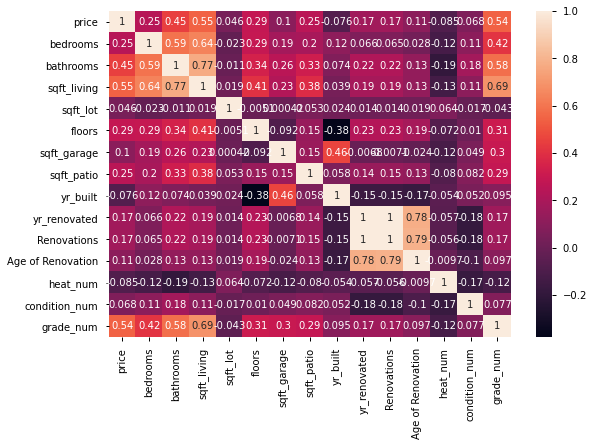

In [123]:
sns.heatmap(historic.corr(),annot=True)
fig=plt.gcf()
fig.set_size_inches(9,6)
plt.show()



In [106]:
# X_cols = list(X.columns)
# formula = "price ~ heat_num + condition_num + grade_num".join(X_cols)

# model = ols(formula = formula, data = historic).fit()

# model_summar = model.summary()

In [117]:
X = df['grade_num']
y = df['price']
dummy_regr = DummyRegressor(strategy="mean")
print(dummy_regr.fit(X, y))

print(dummy_regr.predict(X))
print(dummy_regr.score(X, y))

DummyRegressor()
[1001332.76152023 1001332.76152023 1001332.76152023 ... 1001332.76152023
 1001332.76152023 1001332.76152023]
0.0


In [119]:
pd.get_dummies(X)


,heat_num,condition_num,grade_num
id,,,
7399300360,1.0,4,7
8910500230,3.0,3,7
1180000275,1.0,3,7
2807100156,2.0,3,7
5122400111,3.0,4,9
...,...,...,...
8081900170,3.0,4,9
3277800805,3.0,3,7
3915500105,1.0,4,6


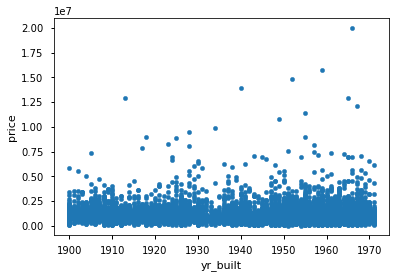

In [87]:
historic.plot(kind='scatter', x= 'yr_built', y='price')
plt.show()
df.plot(kind='scatter', x='grade_num', y= 'price')
plt.show()
df.plot(kind='scatter', x='heat_num', y= 'price')
plt.show()

C:\Users\paperspace\anaconda3\envs\learn-env\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 94.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\paperspace\anaconda3\envs\learn-env\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 84.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\paperspace\anaconda3\envs\learn-env\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 80.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\paperspace\anaconda3\envs\learn-env\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 89.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\paperspace\anac

C:\Users\paperspace\anaconda3\envs\learn-env\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 93.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\paperspace\anaconda3\envs\learn-env\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 95.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\paperspace\anaconda3\envs\learn-env\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 97.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\paperspace\anaconda3\envs\learn-env\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 98.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\paperspace\anac

KeyboardInterrupt: 

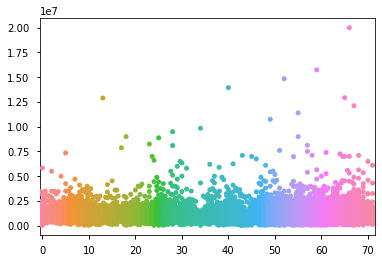

In [122]:
sns.swarmplot(x=historic['yr_built'], y = historic['price'])

In [ ]:
x_train, X_test, y_train, y_test = train_test_split()